<a href="https://colab.research.google.com/github/wiserli/notebooks/blob/main/notebooks/YOLOV8starterGuide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Wiserli](https://wiserli.com/) + [YOLOvX](https://yolovx.com/): YOLOv8 Starter Guide


Welcome to the YOLOv8 Starter Guide! This tutorial is brought to you by [Wiserli](https://wiserli.com/), a leading provider of AI-Powered Products and Services. Visit our website at [yolovx.com](https://yolovx.com) for more information.


Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

#Installation

In [ ]:
!pip install ultralytics==8.0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.1 MB/s eta 0:00:00


In [ ]:
# Git clone method (for development)

!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
!pip install -e .

Cloning into 'ultralytics'...
remote: Enumerating objects: 16549, done.
remote: Counting objects: 100% (264/264), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 16549 (delta 145), reused 136 (delta 71), pack-reused 16285
Receiving objects: 100% (16549/16549), 8.85 MiB | 24.04 MiB/s, done.
Resolving deltas: 100% (11468/11468), done.
/content/ultralytics
Obtaining file:///content/ultralytics
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.20
    Uninstalling ultralytics-8.0.20:
      Successfully uninstalled ultralytics-8.0.20
  Running setup.py develop for ultralytics


#Inference with Pre Trained

#CLI

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://www.rd.com/wp-content/uploads/2021/06/GettyImages-1205998407-e1624731290663.jpg' save=True

100% 6.23M/6.23M [00:00<00:00, 78.1MB/s]

2023-10-07 04:32:28.236813: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-07 04:32:29.126734: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 333k/333k [00:00<00:00, 12.0MB/s]
image 1/1 /content/GettyImages-1205998407-e1624731290663.jpg: 448x640 2 dogs, 106.3ms
Speed: 0.7ms pre-process, 106.3ms inference, 41.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


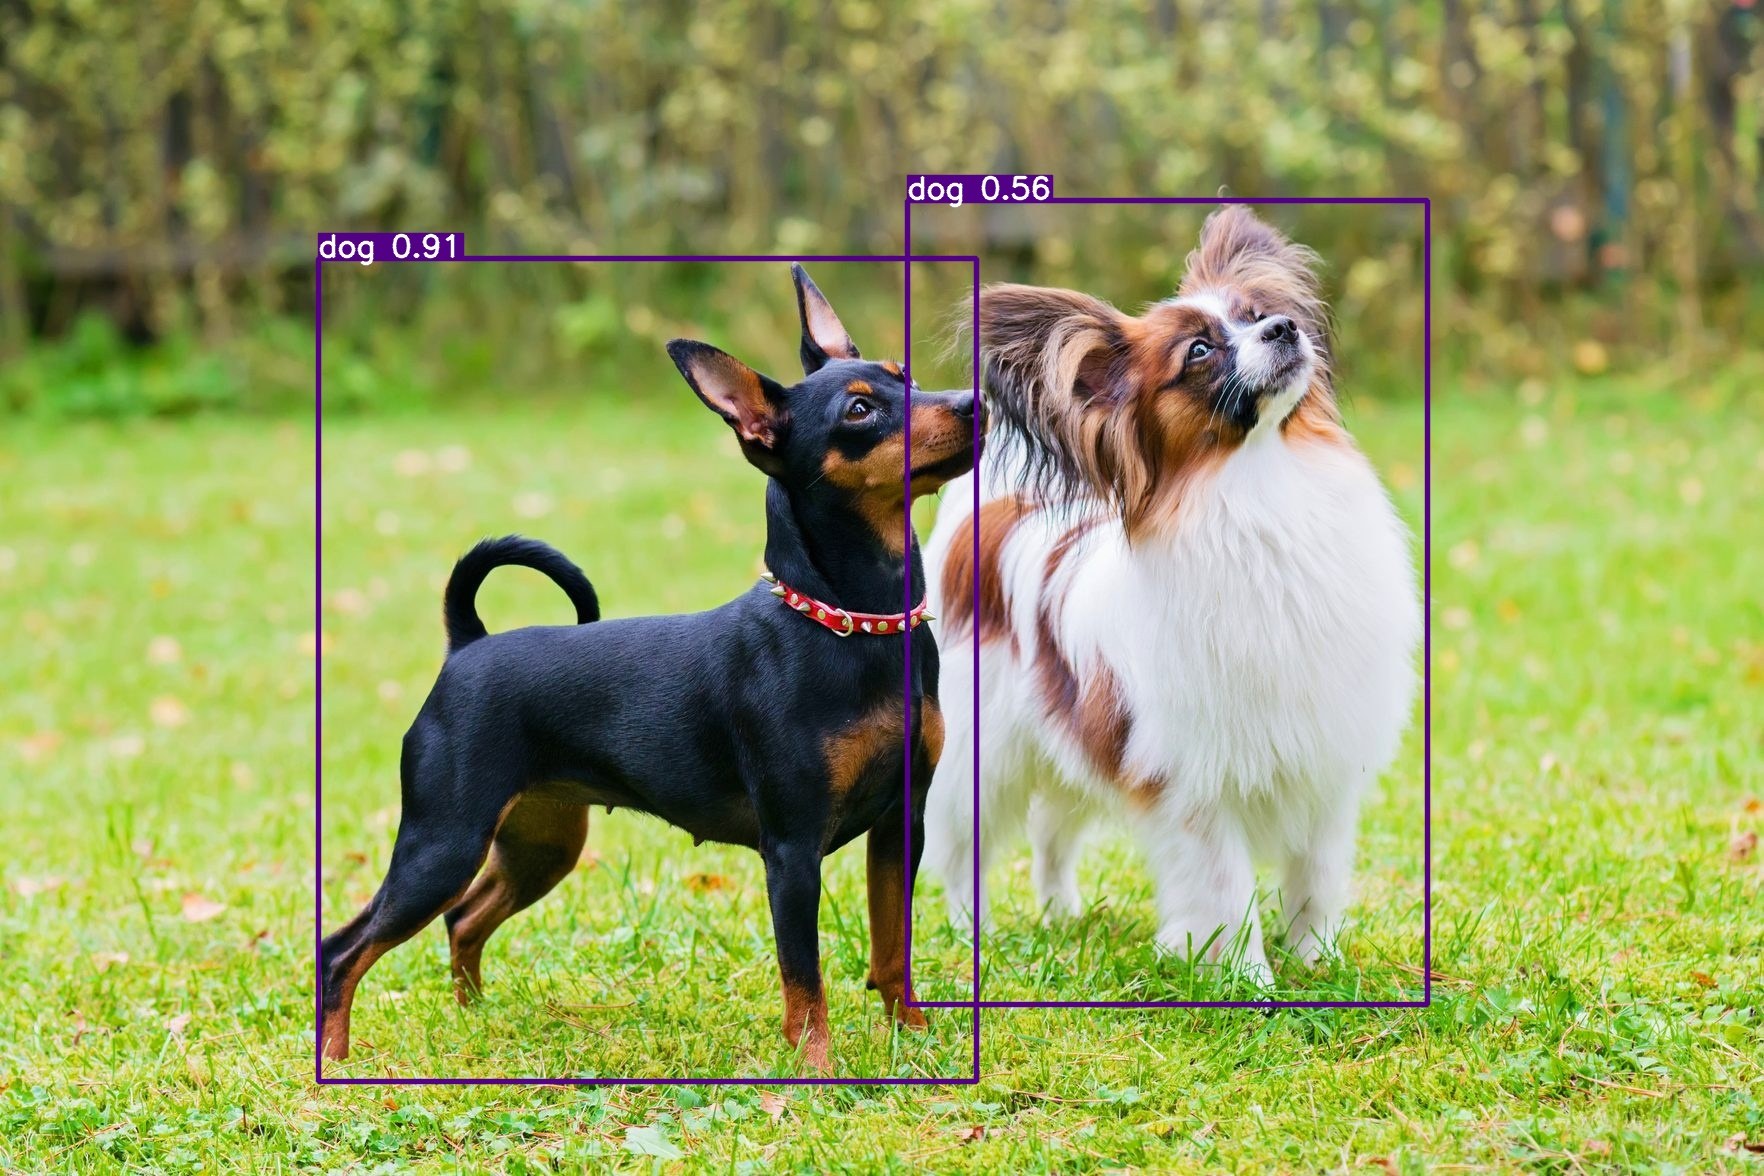

In [ ]:
from IPython.display import display, Image

Image(filename='runs/detect/predict/GettyImages-1205998407-e1624731290663.jpg', height=600)

##Python SDK

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
results = model.predict(source='https://www.rd.com/wp-content/uploads/2021/06/GettyImages-1205998407-e1624731290663.jpg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://www.rd.com/wp-content/uploads/2021/06/GettyImages-1205998407-e1624731290663.jpg locally at GettyImages-1205998407-e1624731290663.jpg


In [ ]:
results[0].boxes

Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([2, 6])
dtype: torch.float32
 + tensor([[3.18000e+02, 2.58000e+02, 9.76000e+02, 1.08100e+03, 9.08454e-01, 1.60000e+01],
        [9.07000e+02, 2.00000e+02, 1.42700e+03, 1.00400e+03, 5.63525e-01, 1.60000e+01]], device='cuda:0')

#Train CLI

In [ ]:
!yolo detect train data=coco128.yaml model=yolov8n.pt epochs=10 imgsz=640

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int

#Train python SDK

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='Argoverse.yaml', epochs=100, imgsz=640)

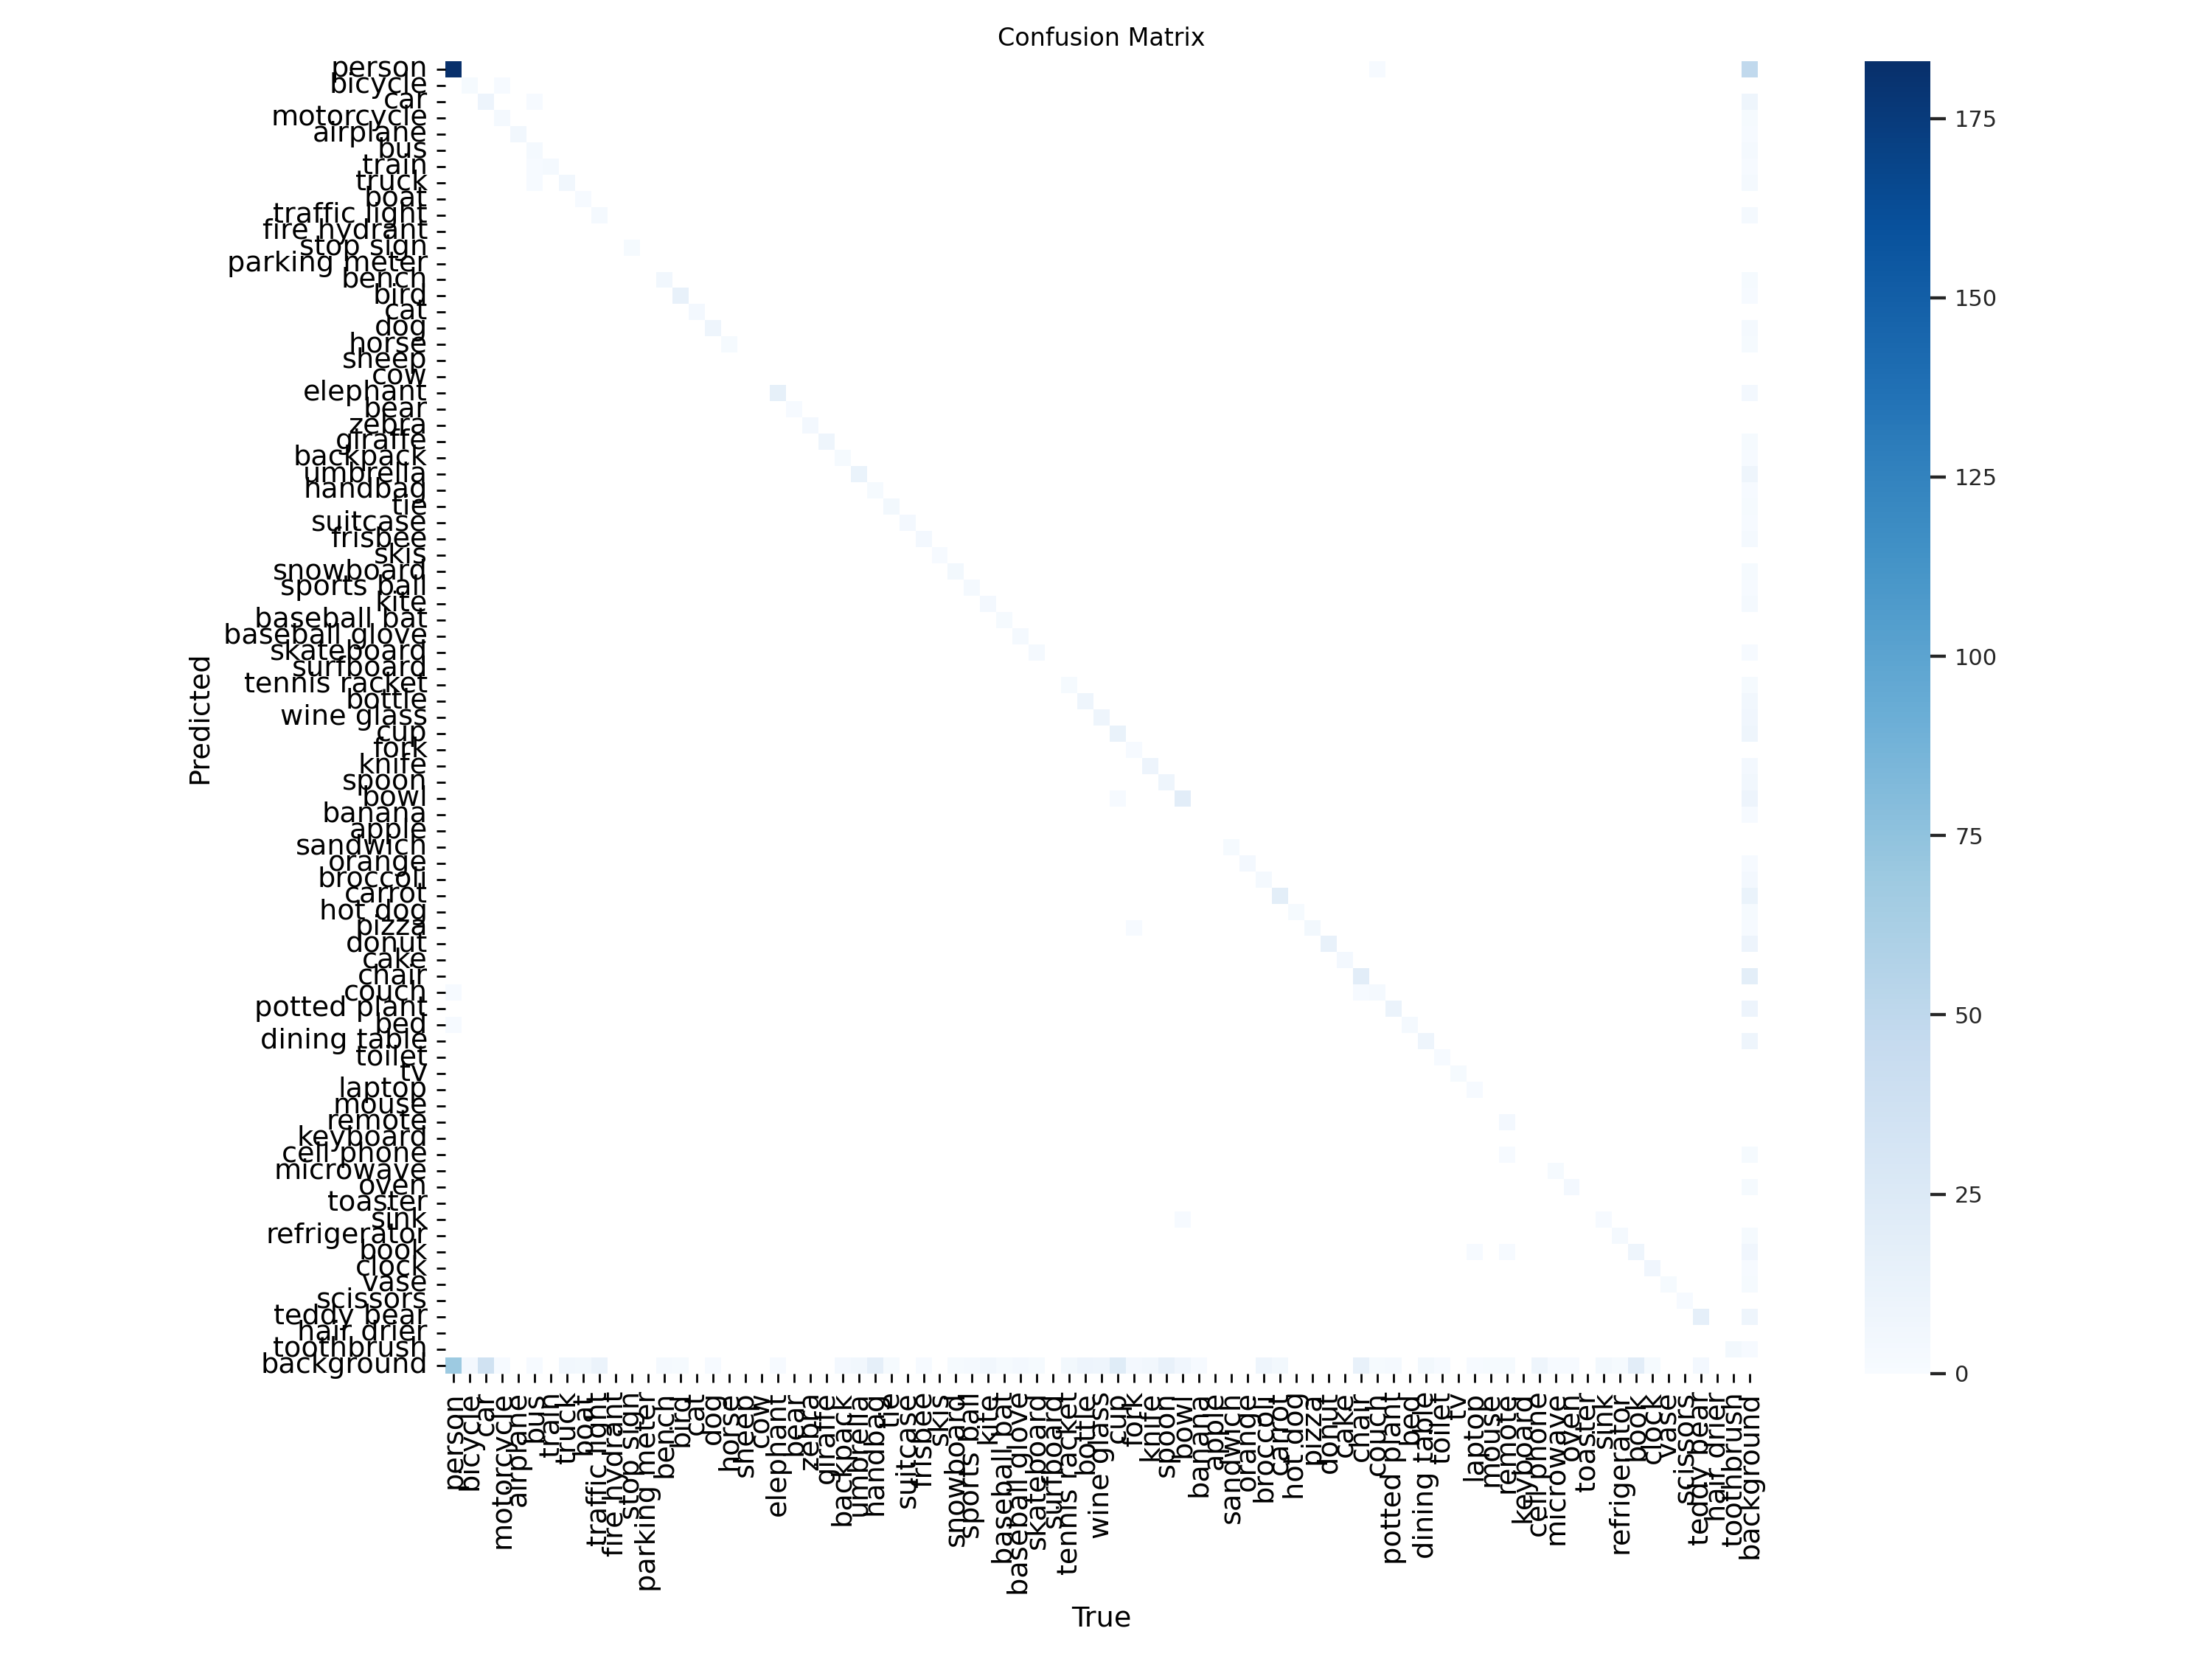

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

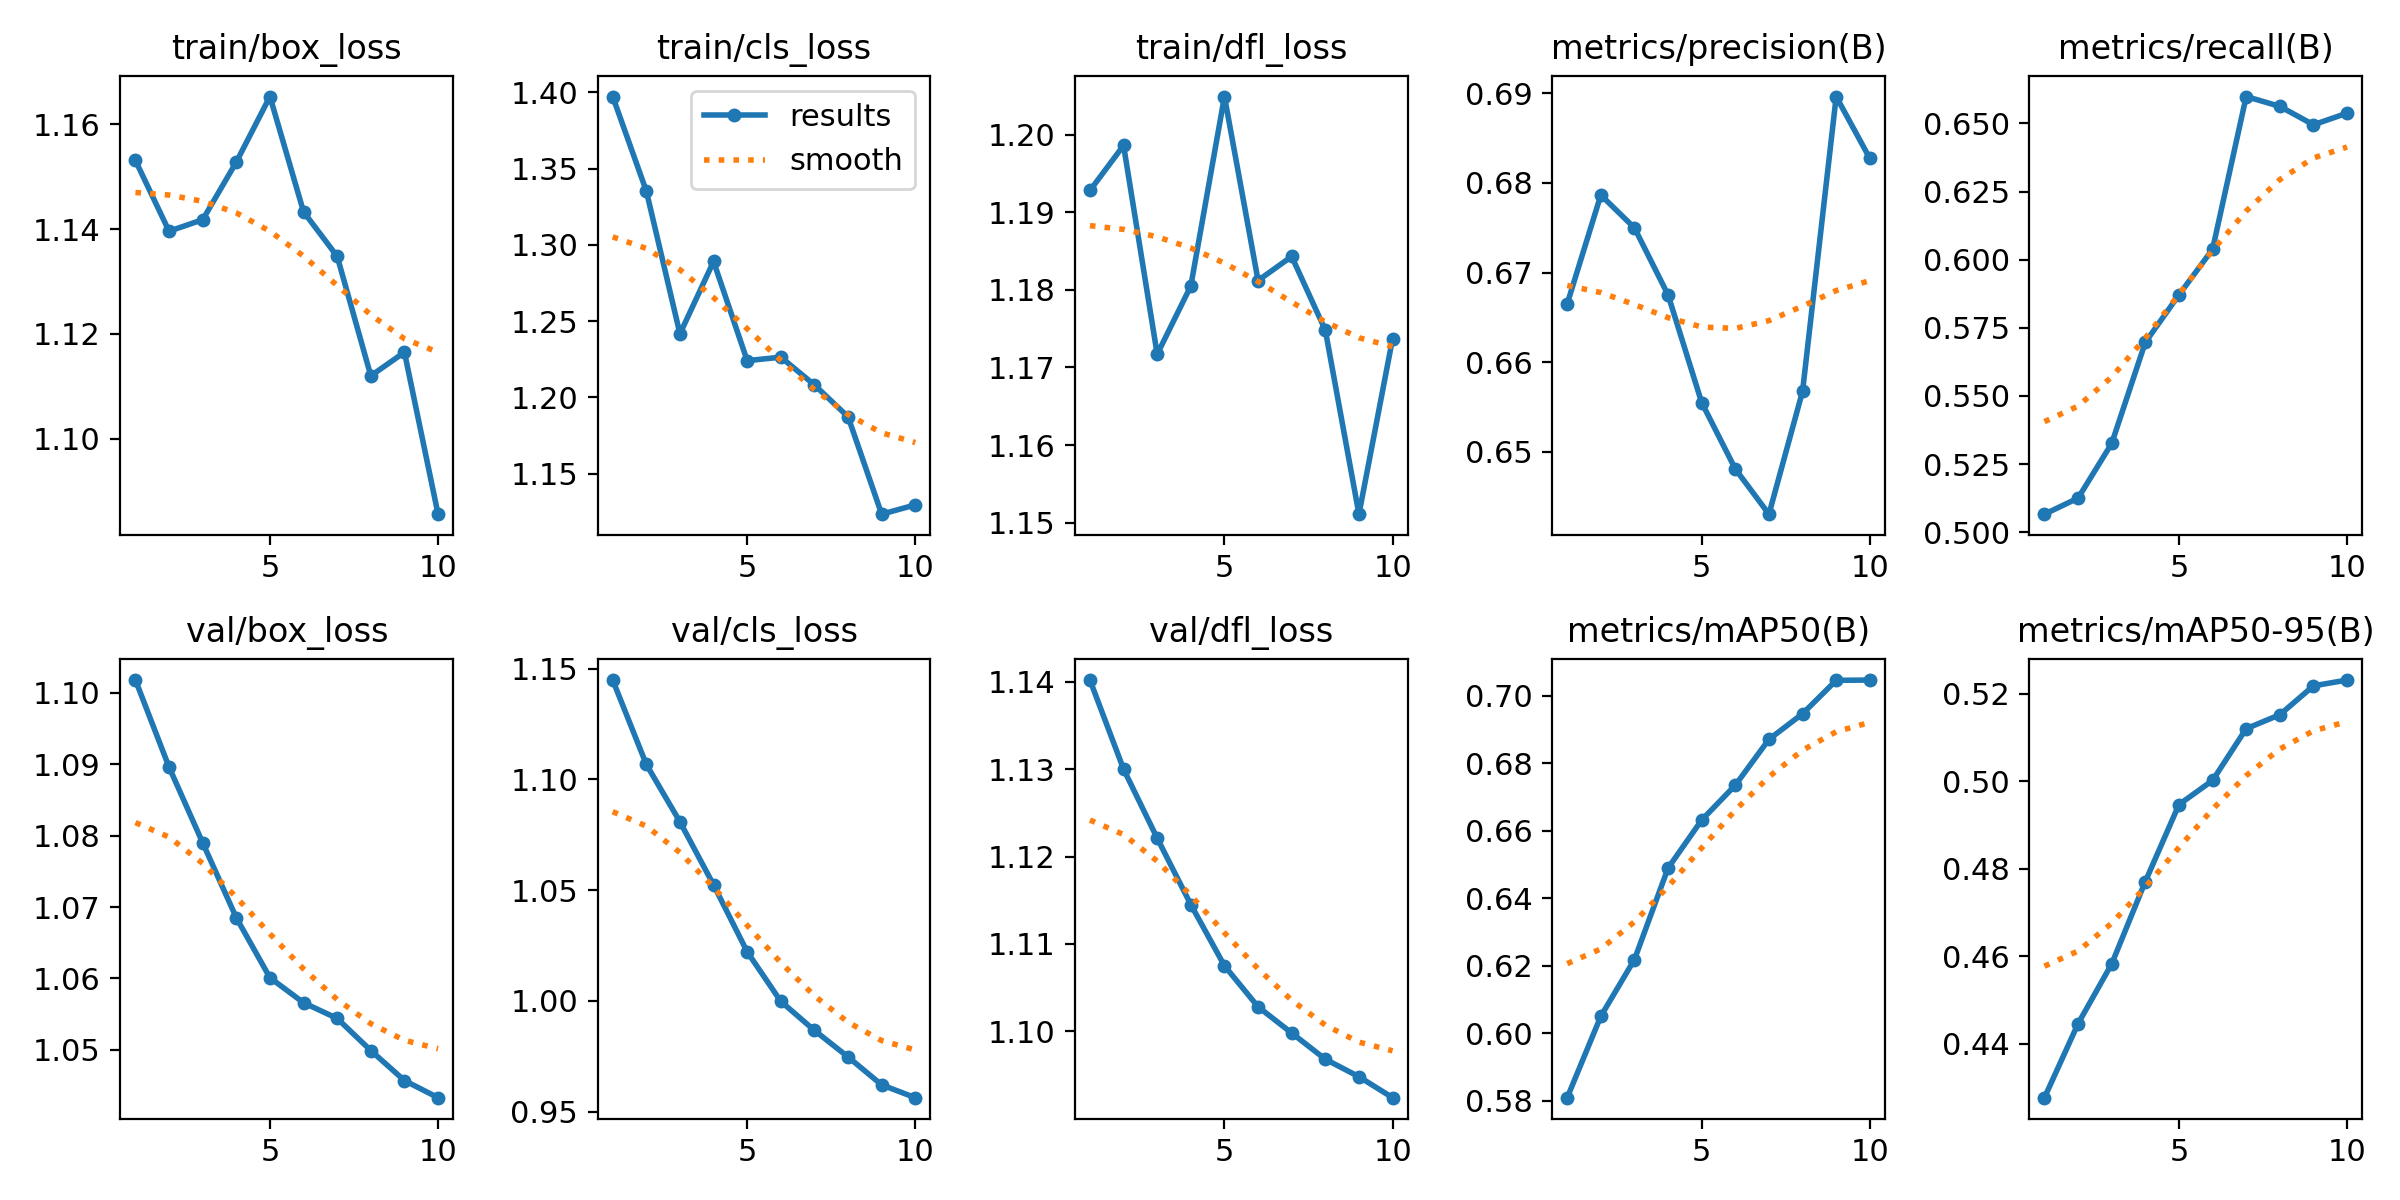

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

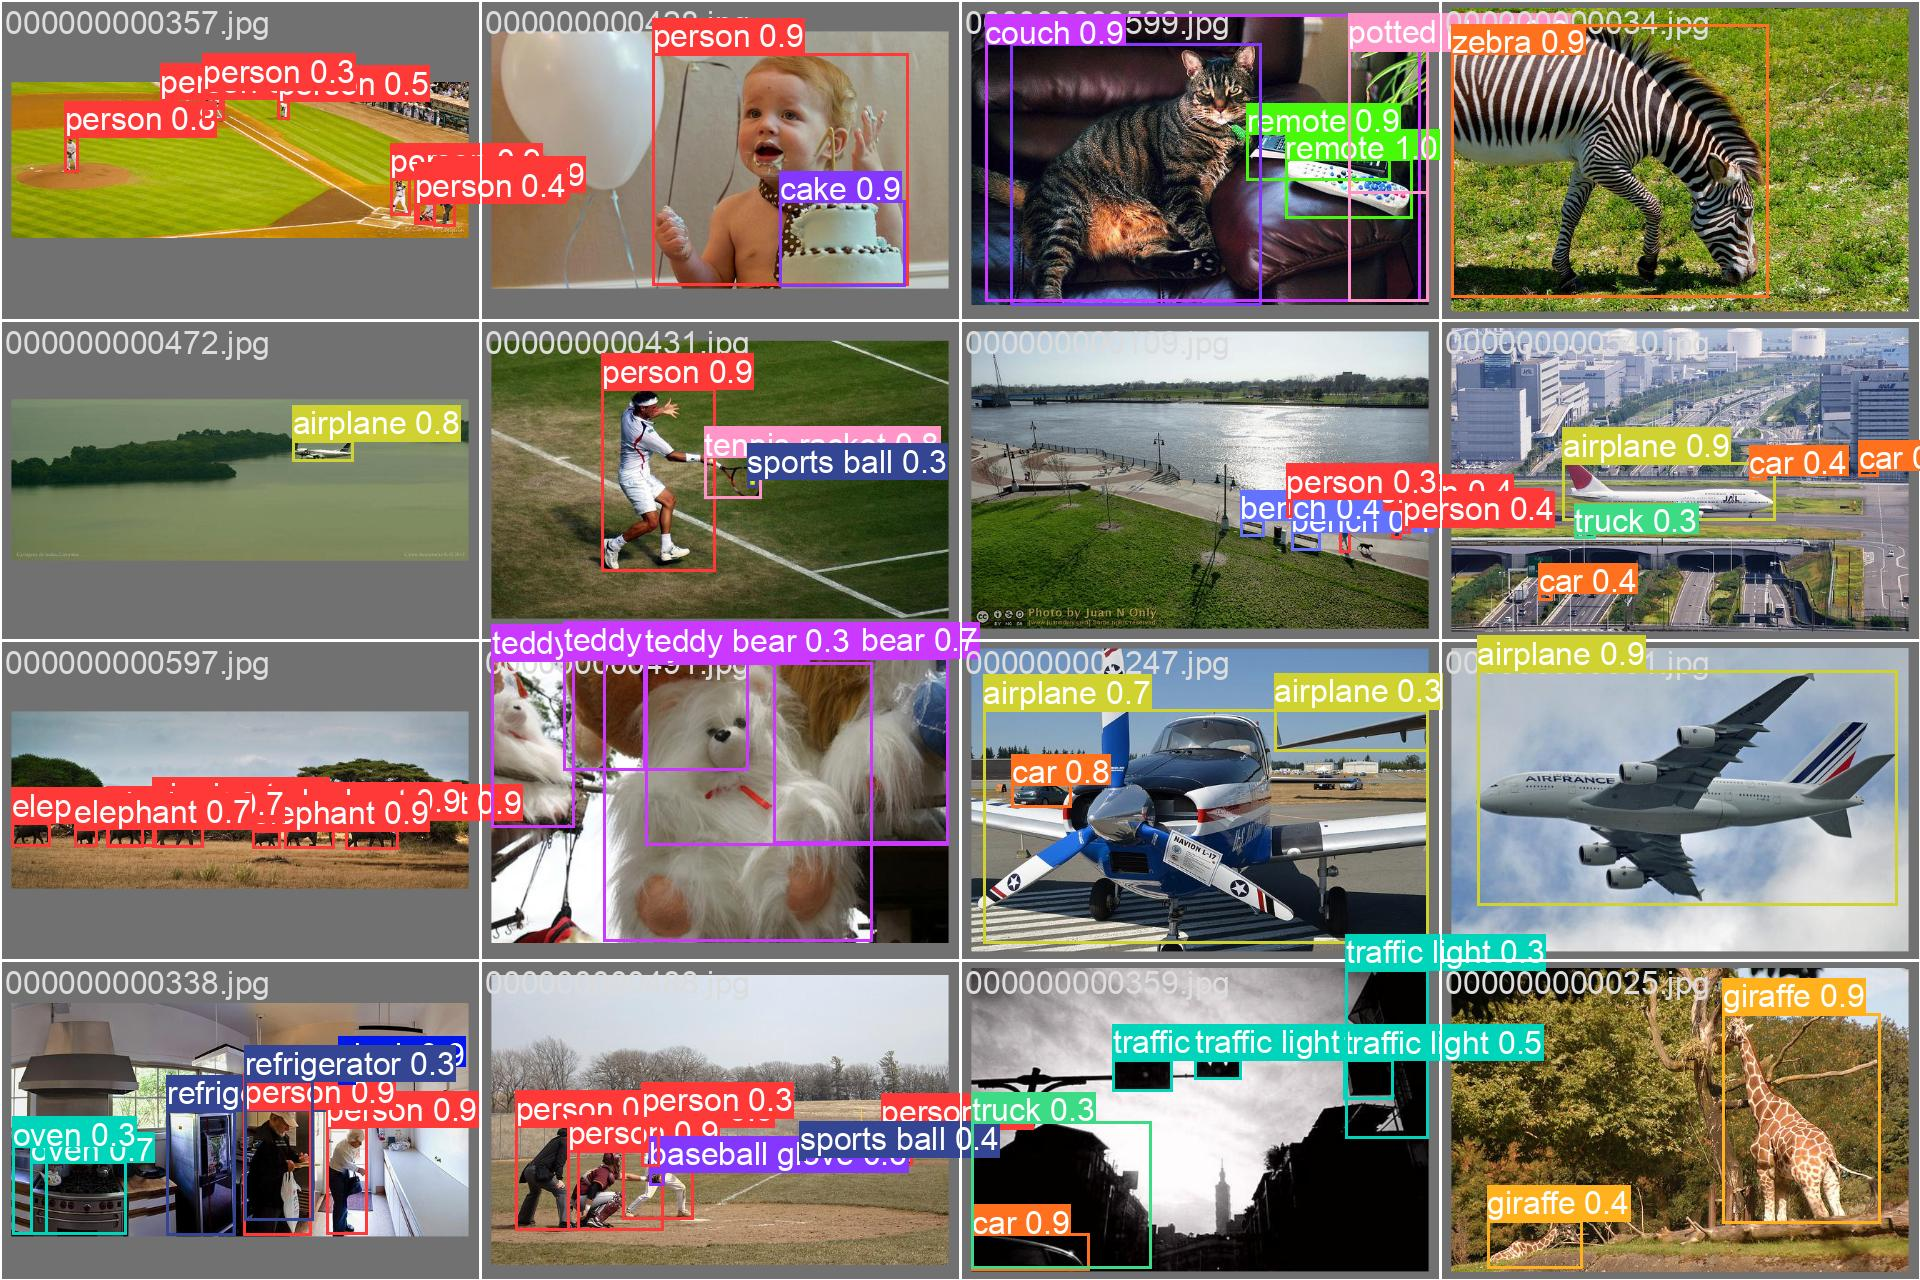

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

#Inference

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/ultralytics/ultralytics/assets |conf=0.25 save=True

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/2 /content/ultralytics/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 103.4ms
image 2/2 /content/ultralytics/ultralytics/assets/zidane.jpg: 384x640 2 persons, 2 ties, 67.8ms
Speed: 2.6ms preprocess, 85.6ms inference, 44.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/ultralytics/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


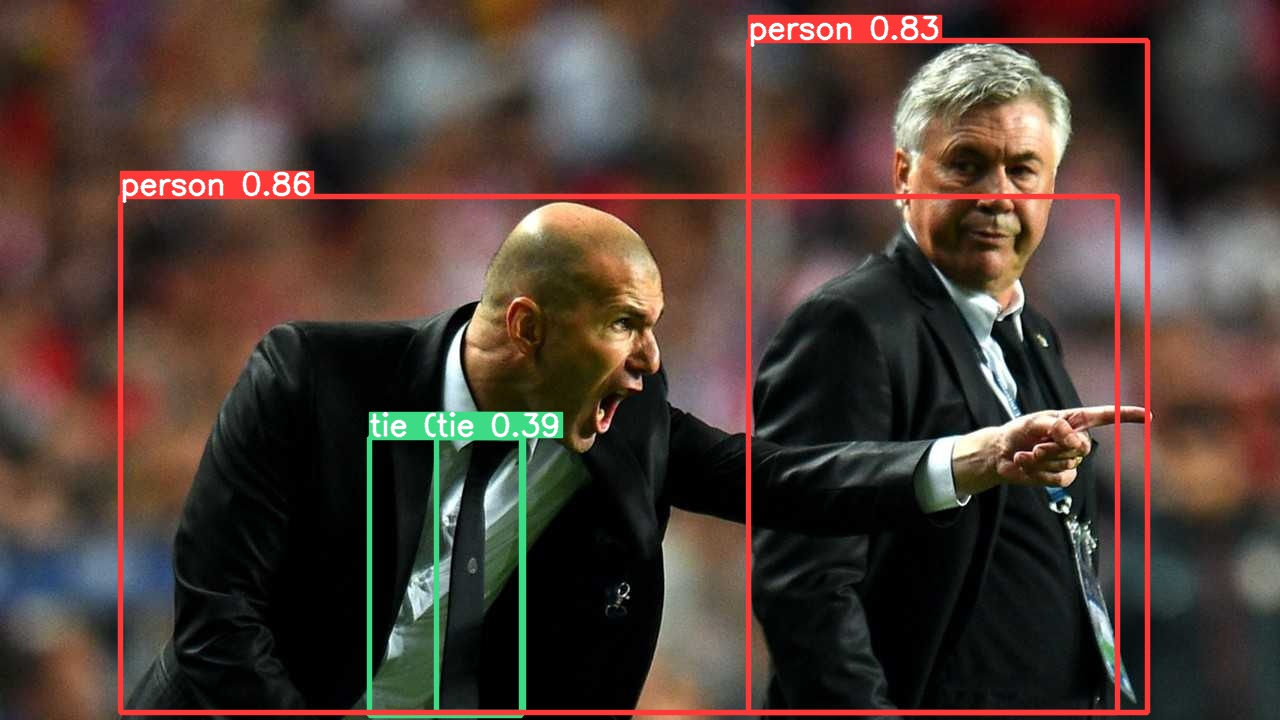

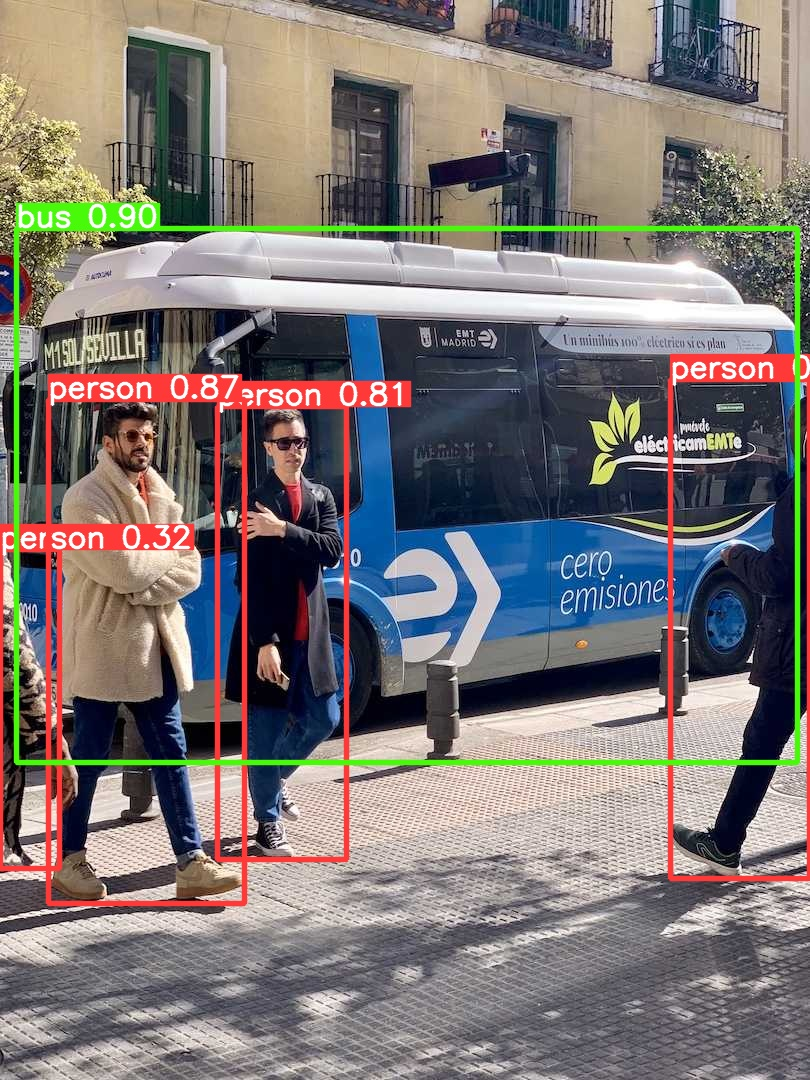

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

Congratulations! You've successfully completed the Wiserli YOLOv8 Starter Guide. For more updates, tutorials, and information on Wiserli, visit [yolovx.com](https://yolovx.com).
